# Brazil's No-show appointment data

The no show appointments data set contains data on ~100k appointments Brazil with focus around whether the appointment ended in a No-show or not. In addition to identifier variables such as Patint ID, Appointment ID etc other variables present in the dataset are Gender, Scheduled date (date of scheduling), Appointment date (date of appointment), age of patient, neighborhood (location of hospital), scholarship (whether patient is enrolled in brasiliant welfate program 'Bolsa Familia', whether the patient has Hypertension, diabetes, is an alcoholic or handicapped (specially abled) and finally whether the appointment resulted in a no show or not.

We shall try to address the following questions using this data:

1. Whether the gender of the patient determines Show/No-show.
2. Whether the age (or age group) of the patient determines Show/No-show.
3. Whether the gap between day of Appointment and day of scheduling the appointment determines Show/No-show.
4. Which  hospitals have a better patient appearance rate than others.
5. Whether any of Hypertension, diabetes, alcoholosm or handicap determines Show/No-show.
6. Whether receiving an SMS regarding the appointment increases the chances of appearance.

### Import requisite libraries

In [57]:
import os
import numpy as np
from datetime import datetime
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Set working directory and load the data set

In [58]:
os.chdir('C:\\Users\\nikhil\\Desktop\\Udacity Data Analyst Nanodegree\\Case Studies\\2a. No Show Appointments\\')
print(os.getcwd())

df = pd.read_csv('noshowappointments.csv')

C:\Users\nikhil\Desktop\Udacity Data Analyst Nanodegree\Case Studies\2a. No Show Appointments


### Explore the data set

In [59]:
df.shape

(110527, 14)

In [60]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Results of info() function shows that there are no missing values

In [62]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Below points can be noted about the data

1. Most of the appointments are for patients between the age of 18-55
2. Most the the patients are not enrolled in the welfare program, don't have hypertension, are non-diabetic and not-handicapped.

### Create new variable 'Appeared' as 1 or 0 from 'No-show'

In [63]:
df['Appeared'] = np.where(df['No-show'] == 'No', 1, 0)

### Convert scheduled day and appointment day to date type formats

In [64]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay, yearfirst = True).apply(lambda x: x.date())

# check data type of ScheduledDay
type(df.ScheduledDay[0])

datetime.date

In [65]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay, yearfirst = True).apply(lambda x: x.date())

# check data type of ScheduledDay
type(df.AppointmentDay[0])

datetime.date

### Create New variables

#### Create new variable for Age bucket from Age

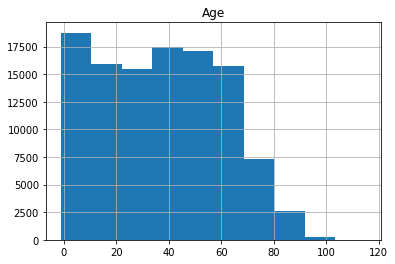

In [66]:
# Check distribution by age

df.hist('Age');

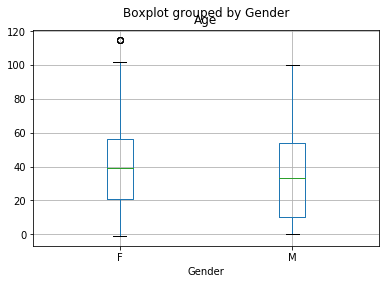

In [67]:
df.boxplot(column = 'Age', by = 'Gender');

In [68]:
df['Age_Bucket'] = pd.cut(df.Age, bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

#### Create new variable 'Day_Difference' as difference in Appointment day and scehduled day and create categories of the same

In [69]:
df['Day_Difference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['Day_Difference_Bucket'] = pd.cut(df['Day_Difference'], bins = 10)

In [70]:
# check frequency

df['Day_Difference_Bucket'].value_counts()

(-6.185, 12.5]    78183
(12.5, 31.0]      22638
(31.0, 49.5]       6396
(49.5, 68.0]       2210
(68.0, 86.5]        776
(86.5, 105.0]       208
(160.5, 179.0]       45
(105.0, 123.5]       35
(123.5, 142.0]       24
(142.0, 160.5]       12
Name: Day_Difference_Bucket, dtype: int64

### Convert categorical variables to its categorical type from string

In [71]:
categorical_columns = ['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes'
                       , 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

for col in categorical_columns:
    df[col] = df[col].astype('category')

### Explore some variables further

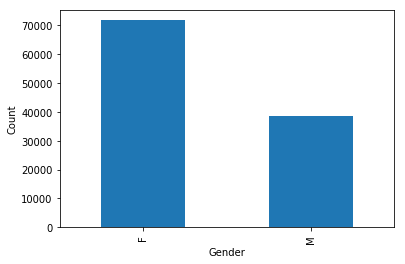

In [72]:
# Split of data by gender

df.groupby('Gender')['PatientId'].count().plot(kind = 'bar').set_ylabel('Count');

The data set contains data on more female appointments than male appointments

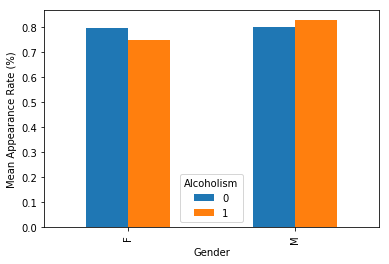

In [73]:
df.groupby(['Gender', 'Alcoholism'])['Appeared'].mean().unstack().plot(kind = 'bar').set_ylabel('Mean Appearance Rate (%)');

The appearance rate in alcoholic males is higher than non-alcoholic males. Whereas the trend is reverse in case of females

### Study factors that may contribute to No-show

C:\Users\nikhil\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


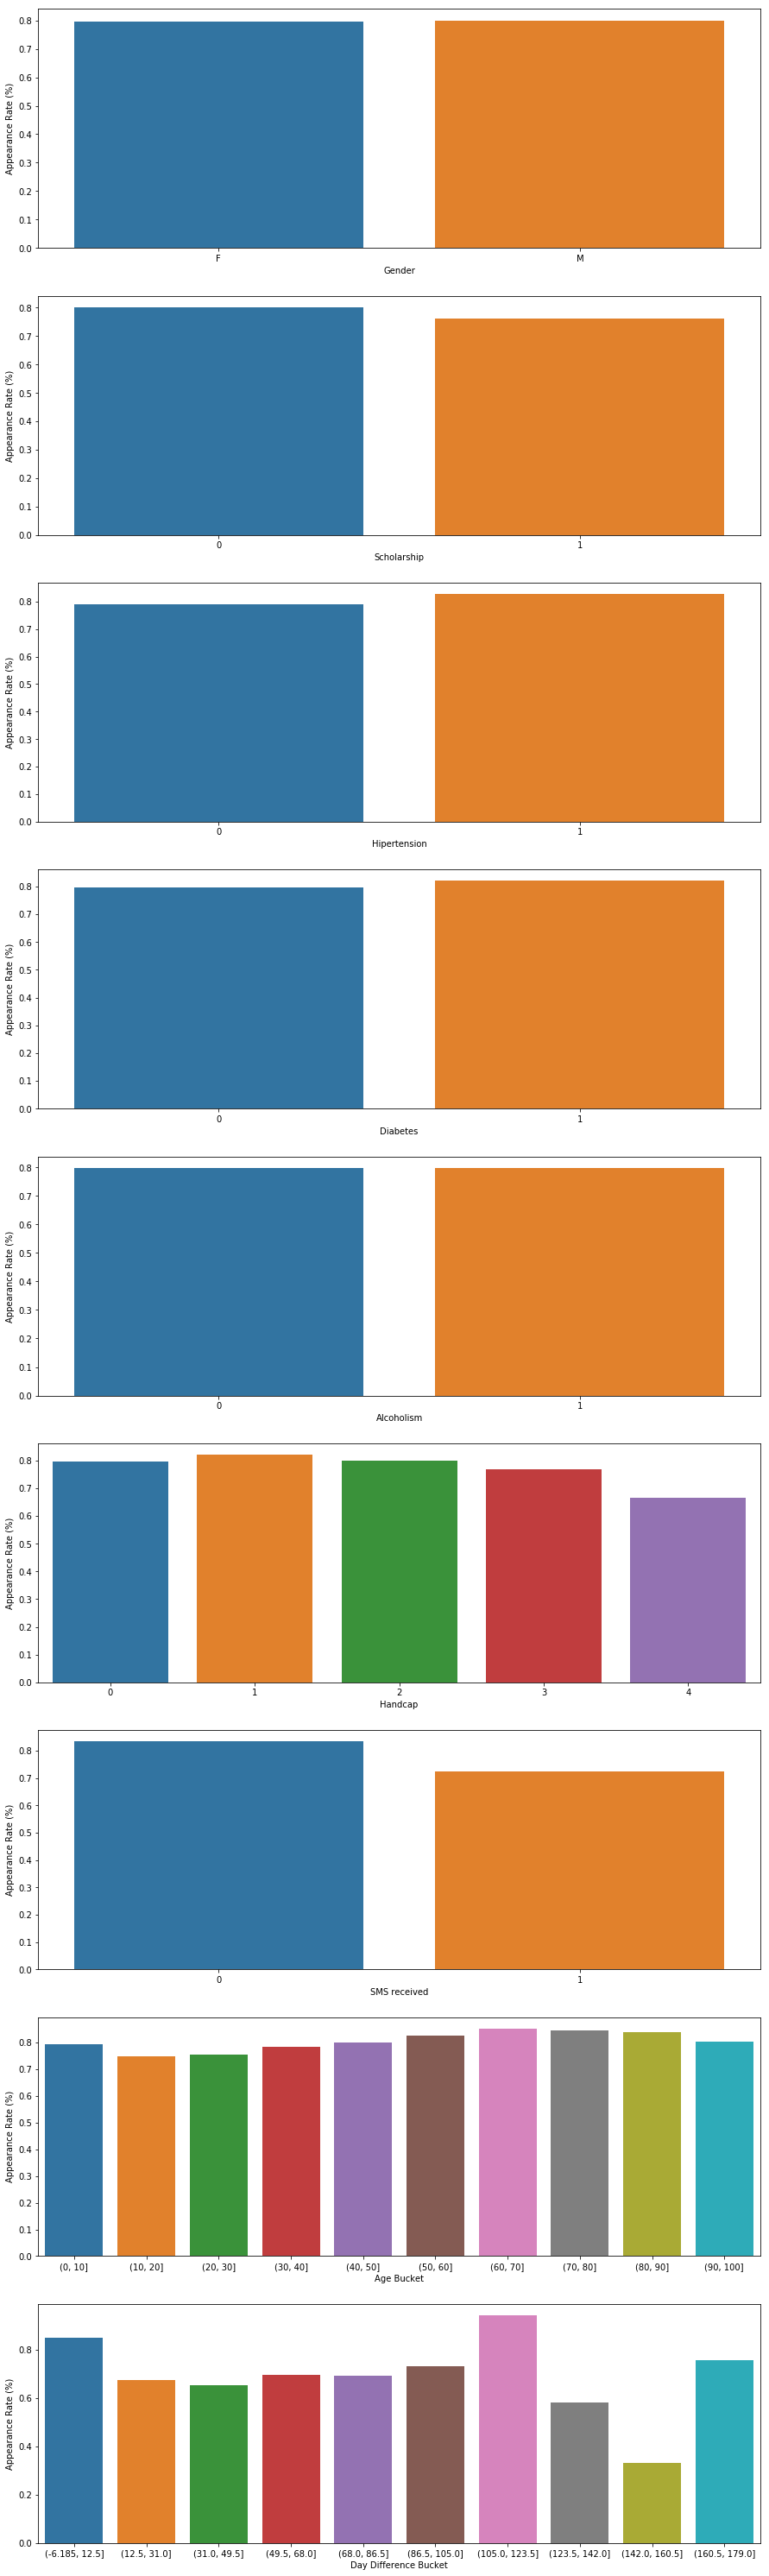

In [74]:
study_columns = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 
                 'Handcap', 'SMS_received', 'Age_Bucket', 'Day_Difference_Bucket']

f, axes = plt.subplots(len(study_columns), 1, figsize = (15, 6*len(study_columns)))
df_study = []

for i in range(len(study_columns)):
    df_study.append(df.groupby(study_columns[i], as_index = False).agg({'Appeared' : {'Sum' : 'sum', 'Count' : 'count'}}))
    df_study[i].columns = ['_'.join(x) for x in df_study[i].columns.ravel()]
    df_study[i]['Appeared_Percent'] = df_study[i]['Appeared_Sum'] / df_study[i]['Appeared_Count']
    p = sns.barplot(data = df_study[i], x = (study_columns[i] + '_'), y = 'Appeared_Percent', ax = axes[i])
    p.set_xlabel(study_columns[i].replace('_', ' '))
    p.set_ylabel('Appearance Rate (%)')


### Below are the findings:
1. No significant difference in appearance rate between males and females
2. Patients who are not enrolled in Brasilian welfare program are more likely to turn up
3. Patients whith Hypertension and Diabetes are more likely to turn up
4. No significant difference in appearance rate between alcoholics and non-alcoholics
5. People whith Handicap levels 1 and 2 are most likely to turn up
6. People who don't receive an SMS are more likely to turn up for the appointment
7. People in the age groups of 0-10 and 60-80 are more likely to turn up than other age groups
8. Appointments where difference in appointment date and scehduled date is between (-6.2 - 12.5) and (105 - 123.5) are more likely to have an appearance as compared to other buckets

### Kindly note that the above findings are based on the difference in Appearance rate for various groups by looking at the above charts. However, they don't provide any statsitical significance of the difference between the various groups. To test the same, statistical tests can be employed.

### Analyse which neighborhood has maximum appearance rate

In [75]:
df_neighborhood = df.groupby('Neighbourhood').agg({'Appeared' : {'Sum' : 'sum', 'Count' : 'count'}})
df_neighborhood.columns = ['_'.join(x) for x in df_neighborhood.columns.ravel()]
df_neighborhood['Appeared_Percent'] = df_neighborhood['Appeared_Sum'] / df_neighborhood['Appeared_Count']
df_neighborhood.sort_values(by = 'Appeared_Percent', ascending = False, inplace = True)

In [76]:
df_neighborhood

,Appeared_Sum,Appeared_Count,Appeared_Percent
Neighbourhood,,,
PARQUE INDUSTRIAL,1,1,1.000000
ILHA DO BOI,32,35,0.914286
AEROPORTO,7,8,0.875000
MÁRIO CYPRESTE,317,371,0.854447
SOLON BORGES,400,469,0.852878
DE LOURDES,258,305,0.845902
DO CABRAL,472,560,0.842857
SANTA MARTHA,2635,3131,0.841584
JARDIM DA PENHA,3246,3877,0.837245


SANTA MARTHA, JARDIM DA PENHA, SANTO ANTÔNIO and JABOUR are some of the hospitals with high number of appointments as well as high appearance rate